# 1. Load the data

Hypothesis: younger pets adopts faster than older pets

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [172]:
df = pd.read_csv('datasett/meow_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         14963 non-null  int64  
 1   PetID              14963 non-null  object 
 2   Type               14963 non-null  object 
 3   Name               14963 non-null  object 
 4   Age                14963 non-null  int64  
 5   Breed1             14963 non-null  object 
 6   Breed2             14963 non-null  object 
 7   Gender             14963 non-null  object 
 8   Color1             14963 non-null  object 
 9   Color2             14963 non-null  object 
 10  Color3             14963 non-null  object 
 11  MaturitySize       14963 non-null  object 
 12  FurLength          14963 non-null  object 
 13  Vaccinated         13099 non-null  object 
 14  Dewormed           13186 non-null  object 
 15  Sterilized         13155 non-null  object 
 16  Health             149

In [173]:
df.head()

,Unnamed: 0,PetID,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,...,Dewormed,Sterilized,Health,State,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,AdoptionSpeedBool
0,0,86e1089a3,Cat,Nibble,3,Tabby,Tabby,Male,Black,White,...,No,No,Healthy,Selangor,1,100,0,1.0,2,Fast
1,1,6296e909a,Cat,No Name Yet,1,Domestic Medium Hair,Domestic Medium Hair,Male,Black,Brown,...,NaN,NaN,Healthy,Kuala Lumpur,1,0,0,2.0,0,Fast
2,2,3422e4906,Dog,Brisco,1,Mixed Breed,Mixed Breed,Male,Brown,White,...,Yes,No,Healthy,Selangor,1,0,0,7.0,3,Slow
3,3,5842f1ff5,Dog,Miko,4,Mixed Breed,Mixed Breed,Female,Black,Brown,...,Yes,No,Healthy,Kuala Lumpur,1,150,0,8.0,2,Fast
4,4,850a43f90,Dog,Hunter,1,Mixed Breed,Mixed Breed,Male,Black,Black,...,No,No,Healthy,Selangor,1,0,0,3.0,2,Fast


# 2. EDA

In [174]:
df = df.drop(["Unnamed: 0", "PetID", "Name", "VideoAmt", "PhotoAmt"], axis=1)
df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,State,Quantity,Fee,AdoptionSpeed,AdoptionSpeedBool
0,Cat,3,Tabby,Tabby,Male,Black,White,White,Small,Short,No,No,No,Healthy,Selangor,1,100,2,Fast
1,Cat,1,Domestic Medium Hair,Domestic Medium Hair,Male,Black,Brown,Brown,Medium,Medium,NaN,NaN,NaN,Healthy,Kuala Lumpur,1,0,0,Fast
2,Dog,1,Mixed Breed,Mixed Breed,Male,Brown,White,White,Medium,Medium,Yes,Yes,No,Healthy,Selangor,1,0,3,Slow
3,Dog,4,Mixed Breed,Mixed Breed,Female,Black,Brown,Brown,Medium,Short,Yes,Yes,No,Healthy,Kuala Lumpur,1,150,2,Fast
4,Dog,1,Mixed Breed,Mixed Breed,Male,Black,Black,Black,Medium,Short,No,No,No,Healthy,Selangor,1,0,2,Fast


In [175]:
print(df.isnull().sum())


Type                    0
Age                     0
Breed1                  0
Breed2                  0
Gender                  0
Color1                  0
Color2                  0
Color3                  0
MaturitySize            0
FurLength               0
Vaccinated           1864
Dewormed             1777
Sterilized           1808
Health                  0
State                   0
Quantity                0
Fee                     0
AdoptionSpeed           0
AdoptionSpeedBool       0
dtype: int64


### Removing null

In [176]:
print(df["Vaccinated"].unique())
print(df["Dewormed"].unique())
print(df["Sterilized"].unique())

['No' nan 'Yes']
['No' nan 'Yes']
['No' nan 'Yes']


In [177]:
df["Vaccinated"] = df["Vaccinated"].map({"No": 0, np.nan: 0, "Yes": 1})
df["Dewormed"] = df["Dewormed"].map({"No": 0, np.nan: 0, "Yes": 1})
df["Sterilized"] = df["Sterilized"].map({"No": 0, np.nan: 0, "Yes": 1})

print(df["Vaccinated"].unique())
print(df["Dewormed"].unique())
print(df["Sterilized"].unique())

[0 1]
[0 1]
[0 1]


### Object to ints

In [178]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}")
    print('-' * 50)

'Type': ['Cat' 'Dog']
--------------------------------------------------
'Age': [  3   1   4  12   0   2  78   6   8  10  36  14  24   5  72  60   9  48
  62  47 120  32   7  17  22  16  13  19  11  37  18  55  20  28  74  53
  25  84  76  30 132  96  46  15  50  56  54  23  92  29  27  49  44 144
  21  31  41  51  65  34 135  39  52  42 108  81  26  38  69 212  33  75
  95  80  63  61 255  89  91  35 117  73 122 123  64  87 112 156  66  67
  77 180  82  86  40  57 168 102  45 147  68  85  88  43 238 100]
--------------------------------------------------
'Breed1': ['Tabby' 'Domestic Medium Hair' 'Mixed Breed' 'Domestic Short Hair'
 'Domestic Long Hair' 'Terrier' 'Persian' 'Rottweiler' 'Shih Tzu'
 'Siamese' 'Jack Russell Terrier' 'American Shorthair' 'Spitz'
 'Labrador Retriever' 'Pit Bull Terrier' 'Silky Terrier' 'Bombay' 'Husky'
 'Schnauzer' 'Golden Retriever' 'Siberian Husky' 'Collie'
 'German Shepherd Dog' 'Tortoiseshell' 'Doberman Pinscher' 'Calico'
 'American Staffordshire Terrie

In [179]:
breed_map = {i: v for i, v in enumerate(set(df["Breed1"].unique()).union(set(df["Breed2"].unique())))}
color_map = {i: v for i, v in enumerate(set(df["Color1"].unique()).union(set(df["Color2"].unique())).union(set(df["Color3"].unique())))}
state_map = {i: v for i, v in enumerate(set(df["State"].unique()))}

type_map = {0: 'Cat', 1: 'Dog'}
gender_map = {0: 'Male', 1: 'Female', 2: 'Mixed'}
size_map = {0: 'Small', 1: 'Medium', 2: 'Large', 3: 'Extra Large'}
length_map = {0: 'Short', 1: 'Medium', 2: 'Long'}
health_map = {0: 'Healthy', 1: 'Minor Injury', 2: 'Serious Injury'}
speed_map = {0: 'Slow', 1: 'Fast'}

df["Breed1"] = df["Breed1"].map({v: k for k, v in breed_map.items()})
df["Breed2"] = df["Breed2"].map({v: k for k, v in breed_map.items()})
df["Color1"] = df["Color1"].map({v: k for k, v in color_map.items()})
df["Color2"] = df["Color2"].map({v: k for k, v in color_map.items()})
df["Color3"] = df["Color3"].map({v: k for k, v in color_map.items()})
df["State"] = df["State"].map({v: k for k, v in state_map.items()})

df["Type"] = df["Type"].map({v: k for k, v in type_map.items()})
df["Gender"] = df["Gender"].map({v: k for k, v in gender_map.items()})
df["MaturitySize"] = df["MaturitySize"].map({v: k for k, v in size_map.items()})
df["FurLength"] = df["FurLength"].map({v: k for k, v in length_map.items()})
df["Health"] = df["Health"].map({v: k for k, v in health_map.items()})
df["AdoptionSpeedBool"] = df["AdoptionSpeedBool"].map({v: k for k, v in speed_map.items()})

In [180]:

for column in df.columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}")
    print('-' * 50)

'Type': [0 1]
--------------------------------------------------
'Age': [  3   1   4  12   0   2  78   6   8  10  36  14  24   5  72  60   9  48
  62  47 120  32   7  17  22  16  13  19  11  37  18  55  20  28  74  53
  25  84  76  30 132  96  46  15  50  56  54  23  92  29  27  49  44 144
  21  31  41  51  65  34 135  39  52  42 108  81  26  38  69 212  33  75
  95  80  63  61 255  89  91  35 117  73 122 123  64  87 112 156  66  67
  77 180  82  86  40  57 168 102  45 147  68  85  88  43 238 100]
--------------------------------------------------
'Breed1': [ 32  70 167 113 123 173 105  94 182 138 121 148 118  60 154  16  10 120
  35  66  99 133 158  38 163  22   9 185 171 104  74 151 109 112 153  65
 156  83  88  19  45   7 108  41  14 152  39 143 155 101  11  13 130 127
 184  79  76  90 137  43 176 140  92   1  56  71 144 162  46   2 132  27
 122  40  67 186  93 135 134 126  75 165  48 164  73 100 169 150  69  59
 129  12  64  34 161 181 159  25  18  85  50  44 115  77  36   8  15   

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Type               14963 non-null  int64
 1   Age                14963 non-null  int64
 2   Breed1             14963 non-null  int64
 3   Breed2             14963 non-null  int64
 4   Gender             14963 non-null  int64
 5   Color1             14963 non-null  int64
 6   Color2             14963 non-null  int64
 7   Color3             14963 non-null  int64
 8   MaturitySize       14963 non-null  int64
 9   FurLength          14963 non-null  int64
 10  Vaccinated         14963 non-null  int64
 11  Dewormed           14963 non-null  int64
 12  Sterilized         14963 non-null  int64
 13  Health             14963 non-null  int64
 14  State              14963 non-null  int64
 15  Quantity           14963 non-null  int64
 16  Fee                14963 non-null  int64
 17  AdoptionSpee

In [182]:
df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,State,Quantity,Fee,AdoptionSpeed,AdoptionSpeedBool
0,0,3,32,32,0,1,4,4,0,0,0,0,0,0,1,1,100,2,1
1,0,1,70,70,0,1,5,5,1,1,0,0,0,0,5,1,0,0,1
2,1,1,167,167,0,5,4,4,1,1,1,1,0,0,1,1,0,3,0
3,1,4,167,167,1,1,5,5,1,0,1,1,0,0,5,1,150,2,1
4,1,1,167,167,0,1,1,1,1,0,0,0,0,0,1,1,0,2,1


### Remove Outliers

<Axes: >

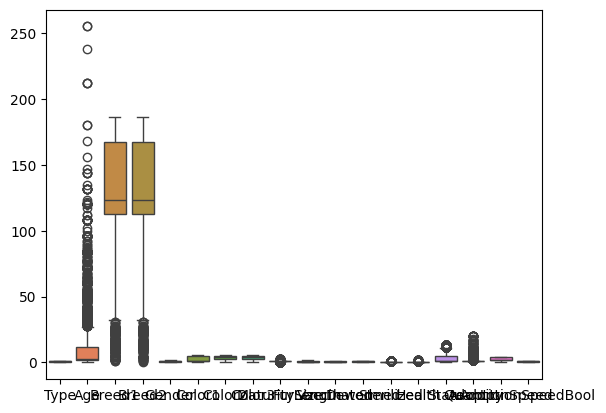

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df.drop(["Fee"], axis=1))

<Axes: >

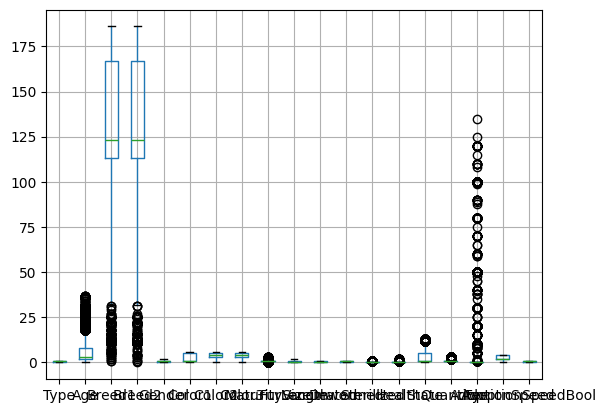

In [184]:
from scipy import stats
df=df[(np.abs(stats.zscore(df['Age'])) < 1.5)]
df=df[(np.abs(stats.zscore(df['Quantity'])) < 1.5)]
df=df[(np.abs(stats.zscore(df['Fee'])) < 1.5)]
df.boxplot()

### Trying to find relationships

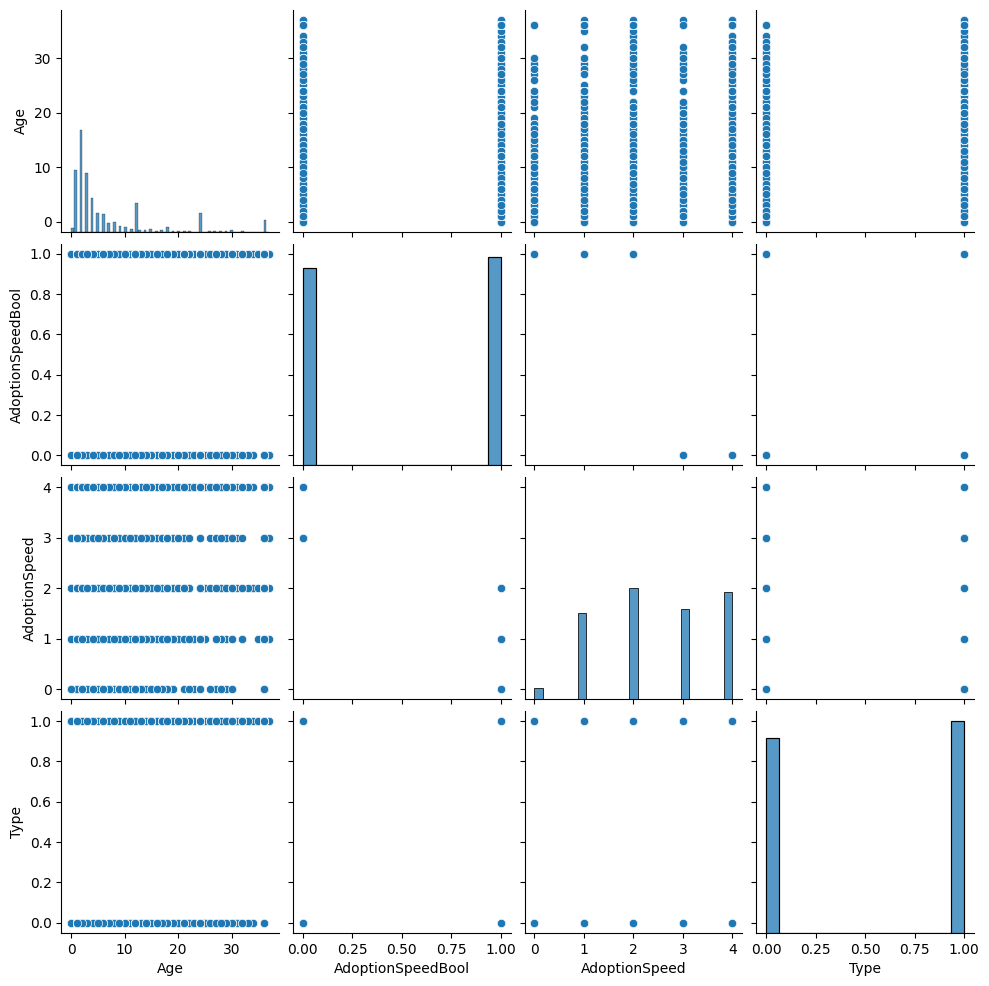

In [185]:


# Select only the chosen numerical columns
selected_columns = ['Age', 'AdoptionSpeedBool', 'AdoptionSpeed', 'Type']

# Create pair plot
sns.pairplot(df[selected_columns])
plt.show()

<Axes: >

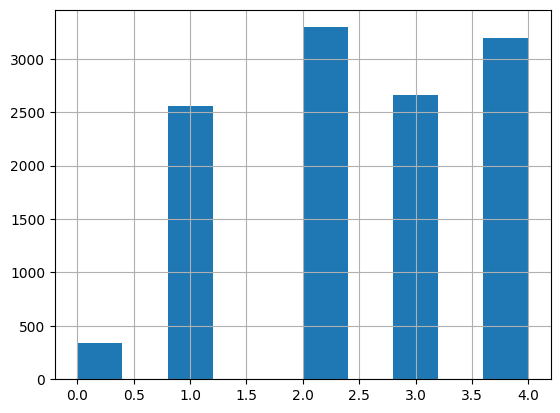

In [186]:
df["AdoptionSpeed"].hist()

# 3. Preprocessing for xgboost

In [187]:
# one hot encoding
df = pd.get_dummies(df, columns=['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'State'], drop_first=True)

# remove cheating variables that gives away the prediction directly
df = df.drop(["AdoptionSpeed"], axis=1)
df.head()

,Type,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,...,State_4,State_5,State_6,State_7,State_8,State_9,State_10,State_11,State_12,State_13
0,0,3,0,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1,0,1,0,1,1,0,0,0,0,1,...,False,True,False,False,False,False,False,False,False,False
2,1,1,0,1,1,1,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
4,1,1,0,1,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
5,0,3,1,1,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False


# 4. Train Model

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [189]:
# Step 1: Separate features and target
variable = 'AdoptionSpeedBool'
X = df.drop(variable, axis=1)  # Features
y = df[variable]               # Target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=100,        # Number of trees
    learning_rate=0.1,       # Step size shrinkage
    max_depth=10,             # Maximum tree depth
    random_state=42,         # Reproducibility
)
xgb_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = xgb_model.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6506224066390042
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.58      0.62      1170
           1       0.64      0.72      0.68      1240

    accuracy                           0.65      2410
   macro avg       0.65      0.65      0.65      2410
weighted avg       0.65      0.65      0.65      2410



# 5. Analysing factor that contributes to predictions

<Figure size 1000x800 with 0 Axes>

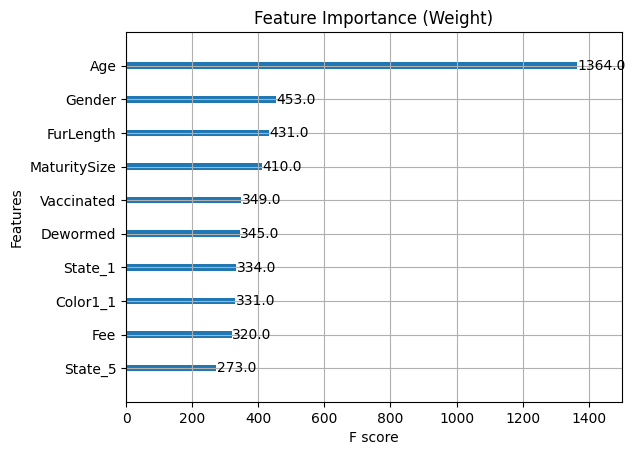

Top 10 important features:
Age: 1364.0
Gender: 453.0
FurLength: 431.0
MaturitySize: 410.0
Vaccinated: 349.0
Dewormed: 345.0
State_1: 334.0
Color1_1: 331.0
Fee: 320.0
State_5: 273.0


In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# Plot the feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='weight', max_num_features=10, title='Feature Importance (Weight)')
plt.show()

# Step 7: Display feature importance values directly
# Get feature importance values using 'get_booster' method
importance = xgb_model.get_booster().get_score(importance_type='weight')

# Sort by importance value
importance_sorted = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Display top 10 important features
print("Top 10 important features:")
for feature, score in importance_sorted[:10]:
    print(f"{feature}: {score}")


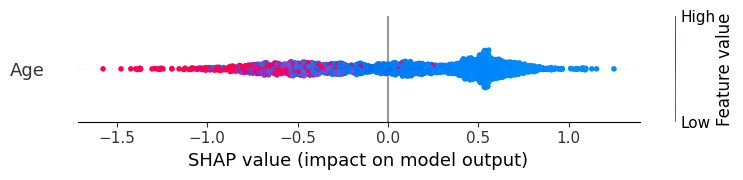

In [191]:
import shap

# Initialize SHAP explainer for the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

varname = 'Age'

# Get the index of the feature
feature_index = X.columns.get_loc(varname)

# Visualize SHAP values for feature
shap.summary_plot(shap_values[:, feature_index:feature_index+1], X_test.iloc[:, feature_index:feature_index+1], feature_names=[varname])


# 5. Conclusion

The Feature importance bar chart has shown that Age is the primary factor driving the model's prediction.

Further analysis using the SHAP summary plot reveals that younger pets tend to be adopted faster (pushing the prediction towards one), while older pets have a slower adoption rate (pushing the prediction towards zero).

The initial hypothesis that younger pets are adopted more quickly is supported by the data.

However, the relationship observed may be influenced by various factors such as gender, fur length, and vaccination. Therefore, further investigation may be needed to draw more definitive conclusion.

# 5. Conclusion

The Feature importance bar chart has shown that Age is the primary factor driving the model's prediction.

By furthur analysing, the SHAP summary plot shows that lower age pushes the prediction to one (fast adoption speed), whereas higher age pushes the prediction to zero (slow adoption speed).

The hypothesis of pet with smaller age adopts faster is supported.

However, the relationship observed may be influenced by various factors such as gender, fur length, and . Therefore, while the model suggests a relationship between Age and animal type, further investigation may be needed to draw a valid conclusion.